In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame, Series
from __future__ import division
import vincenty

%matplotlib inline

In [16]:
sat = pd.read_csv('sat_mean.csv', header=None)

In [18]:
sat.columns = ['zipcode', 'sat']

In [19]:
sat.head()

,zipcode,sat
0,10001.0,0.106094
1,10002.0,0.291831
2,10003.0,0.262093
3,10004.0,0.263393
4,10006.0,0.320912


In [20]:
popu = pd.read_csv('population.csv')

In [21]:
popu.head(2)

,zipcode,population
0,10001,21102
1,10002,81410


In [22]:
sat_popu = sat.merge(popu, how='left',on='zipcode')

In [23]:
sat_popu.head(2)

,zipcode,sat,population
0,10001.0,0.106094,21102.0
1,10002.0,0.291831,81410.0


In [107]:
teen = pd.read_csv('teens_ratio.csv')

In [109]:
teen.drop(['Total', 'teen'],1,inplace=True)

In [110]:
teen.columns = ['zipcode', 'teen']

In [24]:
robbery = pd.read_csv('robbery_count.csv')

In [27]:
robbery.drop(['Latitude','Longitude'], 1,inplace=True)

In [38]:
robbery.columns = ['zipcode', 'robbery']

In [39]:
robbery.head(2)

,zipcode,robbery
0,10001.0,58
1,10002.0,79


In [32]:
frauds = pd.read_csv('frauds.csv', header=None)

In [36]:
frauds.columns = ['zipcode','frauds']

In [37]:
frauds.head()

,zipcode,frauds
0,10280,12
1,10282,8
2,10301,93
3,10302,36
4,10303,67


In [40]:
single = pd.read_csv('single_ratio.csv')

In [41]:
single.head()

,ZIP,total,single,ratio
0,10001.0,53572,6244,0.116553
1,10002.0,58474,11459,0.195967
2,10003.0,76620,8638,0.112738
3,10004.0,26912,2013,0.074799
4,10005.0,17562,1328,0.075618


In [42]:
single.drop(['total','single'], 1, inplace=True)

In [43]:
single.head(2)

,ZIP,ratio
0,10001.0,0.116553
1,10002.0,0.195967


In [44]:
single.columns = ['zipcode', 'single']

In [46]:
single.head(2)

,zipcode,single
0,10001.0,0.116553
1,10002.0,0.195967


In [47]:
sat.head()

,zipcode,sat
0,10001.0,0.106094
1,10002.0,0.291831
2,10003.0,0.262093
3,10004.0,0.263393
4,10006.0,0.320912


In [90]:
sat_c = sat.merge(robbery, how='outer', on='zipcode')

sat_c = sat_c.merge(frauds, how='outer', on='zipcode')

sat_c = sat_c.merge(popu, how='outer', on='zipcode')

In [91]:
sat_c.head()

,zipcode,sat,robbery,frauds,population
0,10001.0,0.106094,58.0,65.0,21102.0
1,10002.0,0.291831,79.0,58.0,81410.0
2,10003.0,0.262093,58.0,97.0,56024.0
3,10004.0,0.263393,4.0,13.0,3089.0
4,10006.0,0.320912,NaN,5.0,3011.0


In [63]:
sat_c.dropna(inplace=True)

In [93]:
sat_c.sat = sat_c.sat / sat_c.sat.max()
sat_c.robbery = sat_c.robbery / sat_c.population
sat_c.frauds = sat_c.frauds / sat_c.population

In [94]:
sat_c[['sat','frauds','robbery']].corr()

,sat,frauds,robbery
sat,1.000000,-0.047084,-0.348659
frauds,-0.047084,1.000000,0.617083
robbery,-0.348659,0.617083,1.000000


In [84]:
single_c = single.merge(robbery, how='outer', on='zipcode')

single_c = single_c.merge(frauds, how='outer', on='zipcode')

single_c = single_c.merge(popu, how='outer', on='zipcode')

In [85]:
single_c.head()

,zipcode,single,robbery,frauds,population
0,10001.0,0.116553,58.0,65.0,21102.0
1,10002.0,0.195967,79.0,58.0,81410.0
2,10003.0,0.112738,58.0,97.0,56024.0
3,10004.0,0.074799,4.0,13.0,3089.0
4,10005.0,0.075618,2.0,10.0,7135.0


In [86]:
single_c.single = single_c.single / single_c.single.max()
single_c.robbery = single_c.robbery / single_c.population
single_c.frauds = single_c.frauds / single_c.population

In [87]:
single_c.head()

,zipcode,single,robbery,frauds,population
0,10001.0,0.326562,0.002749,0.003080,21102.0
1,10002.0,0.549066,0.000970,0.000712,81410.0
2,10003.0,0.315873,0.001035,0.001731,56024.0
3,10004.0,0.209575,0.001295,0.004208,3089.0
4,10005.0,0.211868,0.000280,0.001402,7135.0


In [88]:
single_c.dropna(inplace=True)

In [89]:
single_c[['single','frauds','robbery']].corr()

,single,frauds,robbery
single,1.000000,-0.011195,0.413971
frauds,-0.011195,1.000000,0.617083
robbery,0.413971,0.617083,1.000000


In [75]:
total = pd.read_csv('numByZip.csv')

In [76]:
total.head()

,zip,num
0,10001,116
1,10002,87
2,10003,124
3,10004,4
4,10005,7


In [98]:
single_c = single_c.merge(total, how='left',left_on='zipcode',right_on='zip')

In [97]:
single_c.head()

,zipcode,single,robbery,frauds,population
0,10001.0,0.326562,0.002749,0.003080,21102.0
1,10002.0,0.549066,0.000970,0.000712,81410.0
2,10003.0,0.315873,0.001035,0.001731,56024.0
3,10004.0,0.209575,0.001295,0.004208,3089.0
4,10005.0,0.211868,0.000280,0.001402,7135.0


In [99]:
single_c.num = single_c.num/single_c.num.max()

In [100]:
single_c[['single','num','robbery','frauds']].corr()

,single,num,robbery,frauds
single,1.000000,0.492357,0.413971,-0.011195
num,0.492357,1.000000,0.613954,0.317054
robbery,0.413971,0.613954,1.000000,0.617083
frauds,-0.011195,0.317054,0.617083,1.000000


In [101]:
sat_c = sat_c.merge(total, how='left',left_on='zipcode',right_on='zip')

sat_c.num = sat_c.num/sat_c.num.max()

In [106]:
sat_c[['sat','num','robbery','frauds']].corr()

,sat,num,robbery,frauds
sat,1.000000,-0.434326,-0.348659,-0.047084
num,-0.434326,1.000000,0.618301,0.295583
robbery,-0.348659,0.618301,1.000000,0.617083
frauds,-0.047084,0.295583,0.617083,1.000000


In [111]:
teen_c = teen.merge(robbery, how='outer', on='zipcode')

teen_c = teen_c.merge(frauds, how='outer', on='zipcode')

teen_c = teen_c.merge(popu, how='outer', on='zipcode')

In [112]:
teen_c.dropna(inplace=True)

In [113]:
teen_c.head()

,zipcode,teen,robbery,frauds,population
0,10001.0,0.267013,58.0,65.0,21102.0
1,10002.0,0.231128,79.0,58.0,81410.0
2,10003.0,0.306242,58.0,97.0,56024.0
3,10004.0,0.324932,4.0,13.0,3089.0
4,10005.0,0.372504,2.0,10.0,7135.0


In [114]:
teen_c.single = teen_c.teen / teen_c.teen.max()
teen_c.robbery = teen_c.robbery / teen_c.population
teen_c.frauds = teen_c.frauds / teen_c.population

In [118]:
teen_c = teen_c.merge(total, how='left',left_on='zipcode',right_on='zip')

teen_c.num = teen_c.num/teen_c.num.max()

In [119]:
teen_c[['teen','num','robbery','frauds']].corr()

,teen,num,robbery,frauds
teen,1.000000,0.339510,0.400590,0.364411
num,0.339510,1.000000,0.613954,0.317054
robbery,0.400590,0.613954,1.000000,0.617083
frauds,0.364411,0.317054,0.617083,1.000000


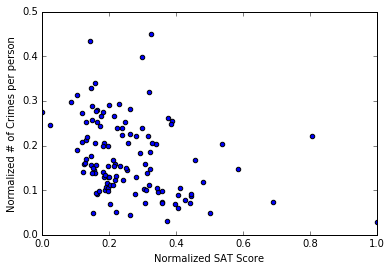

In [51]:
plt.scatter(sat_crime.total, sat_crime.ratio)
plt.xlim(0,1)
plt.ylim(0,0.5)
plt.xlabel('Normalized SAT Score')
plt.ylabel('Normalized # of Crimes per person')

In [93]:
teen = pd.read_csv('single_ratio.csv')

In [94]:
teen.head()

,ZIP,total,single,ratio
0,10001.0,53572,6244,0.116553
1,10002.0,58474,11459,0.195967
2,10003.0,76620,8638,0.112738
3,10004.0,26912,2013,0.074799
4,10005.0,17562,1328,0.075618


In [95]:
teen = teen.merge(popu, how='left', left_on='ZIP',right_on='zipcode')

In [96]:
teen.head()

,ZIP,total,single,ratio,zipcode,population
0,10001.0,53572,6244,0.116553,10001.0,21102.0
1,10002.0,58474,11459,0.195967,10002.0,81410.0
2,10003.0,76620,8638,0.112738,10003.0,56024.0
3,10004.0,26912,2013,0.074799,10004.0,3089.0
4,10005.0,17562,1328,0.075618,10005.0,7135.0


In [97]:
teen = teen.merge(crime_2010, how='left', on='zipcode')

In [98]:
teen.head()

,ZIP,total,single,ratio,zipcode,population,num
0,10001.0,53572,6244,0.116553,10001.0,21102.0,152.0
1,10002.0,58474,11459,0.195967,10002.0,81410.0,108.0
2,10003.0,76620,8638,0.112738,10003.0,56024.0,114.0
3,10004.0,26912,2013,0.074799,10004.0,3089.0,5.0
4,10005.0,17562,1328,0.075618,10005.0,7135.0,2.0


In [99]:
teen['crime_ratio'] = teen.num/teen.population

In [100]:
teen['crime_ratio'] = teen['crime_ratio']/teen['crime_ratio'].max()

In [101]:
teen['ratio'] = teen['ratio']/teen['ratio'].max()

In [102]:
teen[['ratio','crime_ratio']].corr()

,ratio,crime_ratio
ratio,1.000000,0.099287
crime_ratio,0.099287,1.000000


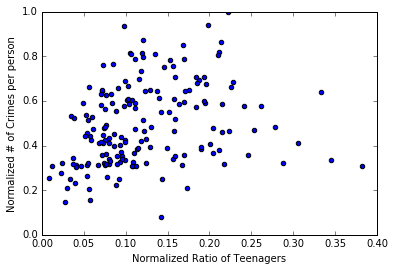

In [104]:
plt.scatter(teen.crime_ratio, teen.ratio)
plt.xlim(0,0.4)
plt.ylim(0,1)
plt.xlabel('Normalized Ratio of Single-Mother Household')
plt.ylabel('Normalized # of Crimes per person')

In [81]:
teen.to_csv('teen_crime.csv')

In [ ]:
crime